# Proyecto Final: Sentiment Analysis
*Integrantes:*
- Elian Garcia
- Pablo Herrera

## Introducción

En la era de la información, el análisis de opiniones y sentimientos expresados en texto ha adquirido una relevancia sin precedentes. Cada día, millones de personas comparten sus pensamientos, emociones y opiniones a través de redes sociales, foros, reseñas de productos y plataformas de servicio al cliente. Comprender el sentimiento detrás de estas expresiones no solo permite a las empresas tomar decisiones informadas sobre sus productos y estrategias, sino que también beneficia áreas como la política, la salud mental y la investigación de mercado.

El análisis de sentimientos, o minería de opiniones, se centra en clasificar el tono emocional subyacente de un texto como positivo, negativo o neutral.En estse caso nosotros vamos a clasificar en 6 emociones o "labels" los cuales son: tristeza, gozo, miedo, enojo, amor, sorpresa. Este problema es particularmente desafiante debido a la complejidad del lenguaje natural, que incluye ambigüedades, sarcasmos y contextos culturales. Por ejemplo, una frase como "Es exactamente lo que esperaba" puede ser percibida como positiva o negativa dependiendo del contexto. Es por esto que nosotros estamos utilizando un dataset para un modelo supervisado, el cual todos los samples ya estan etiquetados y no existe ambiguedad en ciertos casos.

La importancia de resolver este problema radica en su amplio rango de aplicaciones. Las empresas pueden utilizar modelos de análisis de sentimientos para monitorear su reputación en tiempo real, personalizar experiencias de usuario o predecir tendencias del mercado. En el ámbito de la salud mental, esta tecnología puede ser empleada para detectar señales de angustia emocional en publicaciones de redes sociales, mientras que en política, puede ayudar a medir el impacto de discursos o campañas en la opinión pública.

En este proyecto, desarrollaremos un modelo de aprendizaje supervisado para analizar sentimientos en texto. Este enfoque utiliza un conjunto de datos etiquetados, donde cada entrada de texto está asociada con una etiqueta de sentimiento correspondiente, para entrenar algoritmos de aprendizaje automático que puedan generalizar y predecir sentimientos en datos no vistos. Nuestro objetivo es demostrar cómo el aprendizaje automático puede abordar este desafío y contribuir a un mejor entendimiento de las expresiones humanas en el mundo digital.

## Intalación de dependencias

In [3]:
!pip install fastparquet
!pip install kagglehub
!pip install imblearn
!pip install nltk
!python -m nltk.downloader all

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /teamspace/studios/this_studio/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /teamspace/studios/this_studio/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /teamspace/studios/this_studio/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /teamspace/stu

## Preparación dataset

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aadyasingh55/twitter-emotion-classification-dataset")

print("Path to twitter dataset files:", path)

%mv /teamspace/studios/this_studio/.cache/kagglehub/datasets/aadyasingh55/twitter-emotion-classification-dataset/versions/1 /teamspace/studios/this_studio/data/twitter 

Path to twitter dataset files: /teamspace/studios/this_studio/.cache/kagglehub/datasets/aadyasingh55/twitter-emotion-classification-dataset/versions/1
mv: inter-device move failed: '/teamspace/studios/this_studio/.cache/kagglehub/datasets/aadyasingh55/twitter-emotion-classification-dataset/versions/1' to '/teamspace/studios/this_studio/data/twitter/1'; unable to remove target: Directory not empty


In [4]:
#prompt: open this kind of file /teamspace/studios/voluntary-rose-zfmgj/data/twitter/train-00000-of-00001.parquet

import pandas as pd

df_twiter = pd.read_parquet('./data/twitter/train-00000-of-00001.parquet')
print(df_twiter.head())

                                                text  label
0  i feel awful about it too because it s my job ...      0
1                              im alone i feel awful      0
2  ive probably mentioned this before but i reall...      1
3           i was feeling a little low few days back      0
4  i beleive that i am much more sensitive to oth...      2


In [5]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

#Remoción de duplicaods y undersampling
df_twiter.drop_duplicates(inplace=True)

ros = RandomUnderSampler(random_state=42)

X = df_twiter['text']  # Feature: tweet text
y = df_twiter['label']  # Target: emotion labels (0-5)
print("Before undersampling:")
print("X shape:", X.shape)
print("y shape:", y.shape)
print(Counter(y))

X, y = ros.fit_resample(X.to_numpy().reshape(-1, 1), y.to_numpy())
X = X.ravel()
print("After undersampling:")
print("X shape:", X.shape)
print("y shape:", y.shape)
print(Counter(y))

Before undersampling:
X shape: (416123,)
y shape: (416123,)
Counter({1: 140779, 0: 120989, 3: 57235, 4: 47664, 2: 34497, 5: 14959})
After undersampling:
X shape: (89754,)
y shape: (89754,)
Counter({0: 14959, 1: 14959, 2: 14959, 3: 14959, 4: 14959, 5: 14959})


## Visualización TSNE

In [6]:
####Lematization

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

class LemmaTokenizer(object):
  def __init__(self):
    self.wordnetlemma=WordNetLemmatizer()
  def __call__(self,reviews):
    return [self.wordnetlemma.lemmatize(word) for word in word_tokenize(reviews)]

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X = df_twiter['text']
cv = CountVectorizer(analyzer="word", tokenizer=LemmaTokenizer(), ngram_range=(1,1),min_df=10,max_features=500,stop_words = "english")
X_vectorized = cv.fit_transform(X)

y = df_twiter['label']

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [8]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

ros = RandomUnderSampler(random_state=42)

X_balanced,y_balanced =ros.fit_resample(X_vectorized.toarray(),y)

print(Counter(y_balanced))

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

Counter({0: 14959, 1: 14959, 2: 14959, 3: 14959, 4: 14959, 5: 14959})


In [9]:
!pip install seaborn

In [10]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import pandas as pd

X_df = pd.DataFrame(X_balanced)
y_series=pd.Series(y_balanced)

df = pd.concat([X_df, y_series], axis=1)

print(Counter(df['label']))

Counter({0: 14959, 1: 14959, 2: 14959, 3: 14959, 4: 14959, 5: 14959})


In [7]:
import pandas as pd

reduced_df = df.groupby('label').apply(lambda x: x.sample(frac=0.1, random_state=42))

reduced_df = reduced_df.reset_index(drop=True)


In [8]:
X_reduced=reduced_df.drop('label',axis=1)
y_reduced=reduced_df['label']

In [9]:
### PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_reduced)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns


tsne = TSNE(n_components=2, random_state=42, perplexity=50, n_iter=1000)
X_embedded = tsne.fit_transform(X_pca)


Unique labels: [0 1 2 3 4 5]


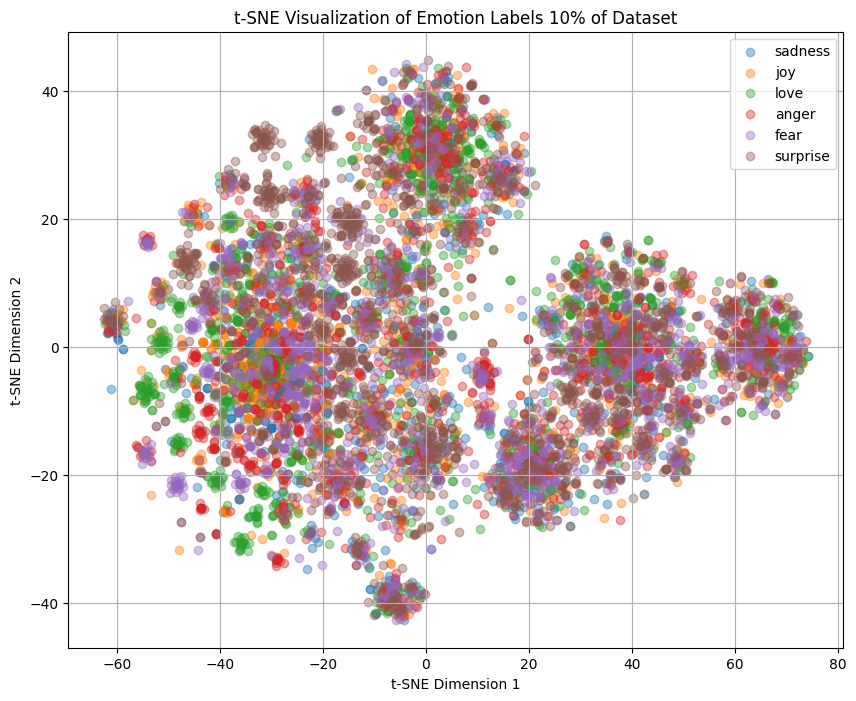

In [17]:
import numpy as np

emotions = ["sadness", "joy", "love", "anger","fear" ,"surprise"]

plt.figure(figsize=(10, 8))

unique_labels = np.unique(y_reduced)
print("Unique labels:", unique_labels)

for label in np.unique(y_reduced):
    emotion_name = emotions[label]
    plt.scatter(
        X_embedded[y_reduced == label, 0],
        X_embedded[y_reduced == label, 1],
        label=emotion_name,
        alpha=0.4
    )

plt.title("t-SNE Visualization of Emotion Labels 10% of Dataset")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()
plt.grid(True)
plt.show()

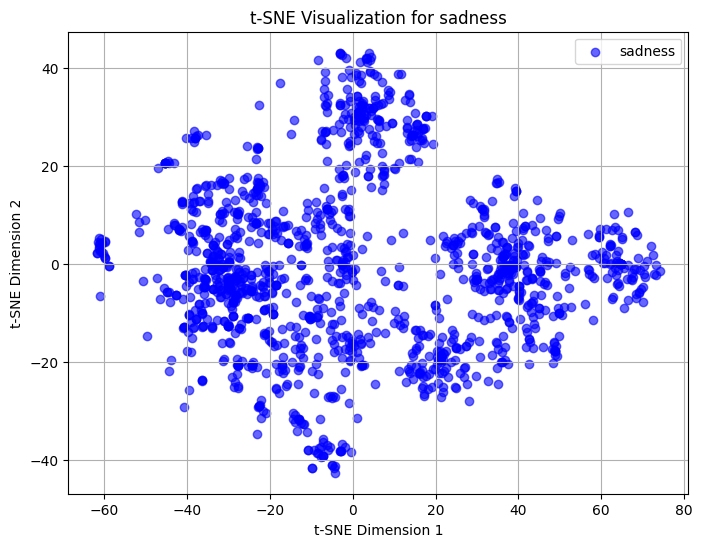

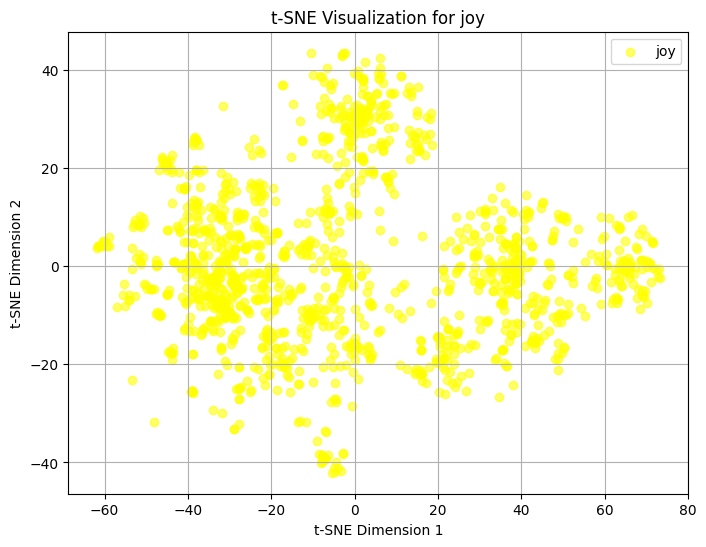

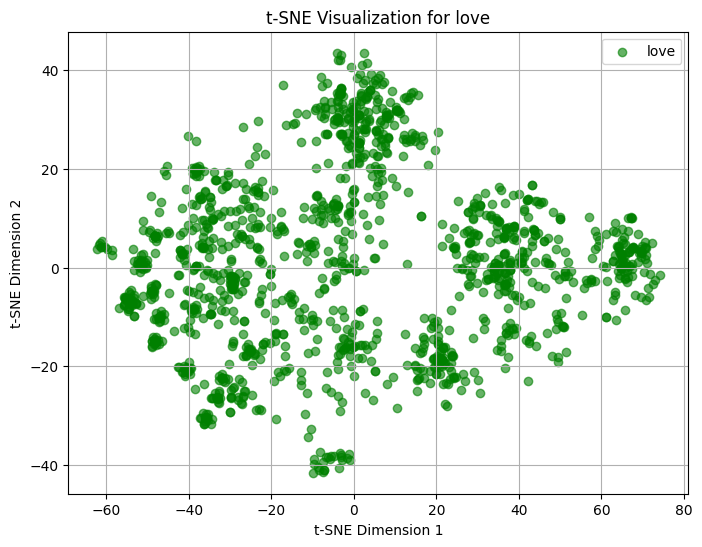

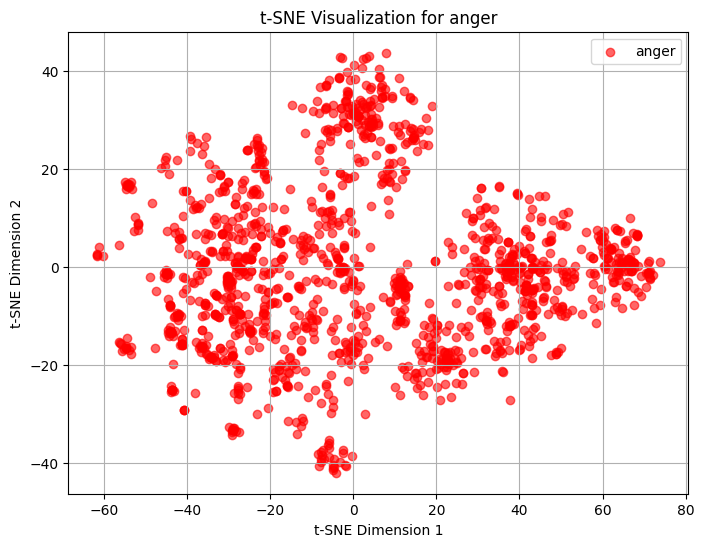

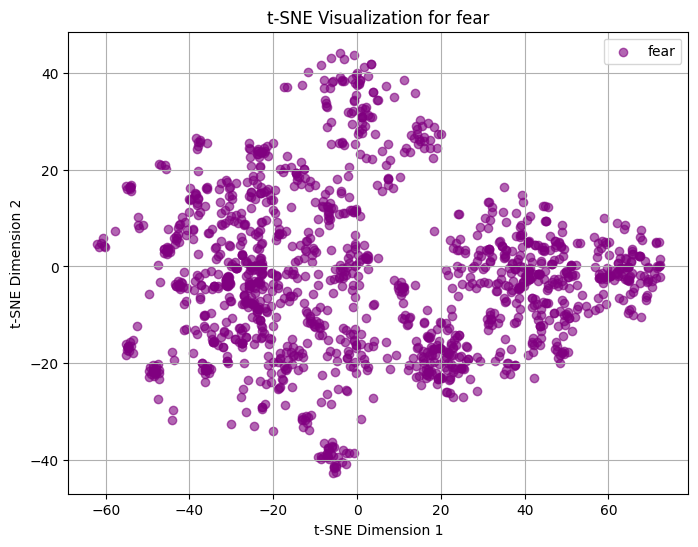

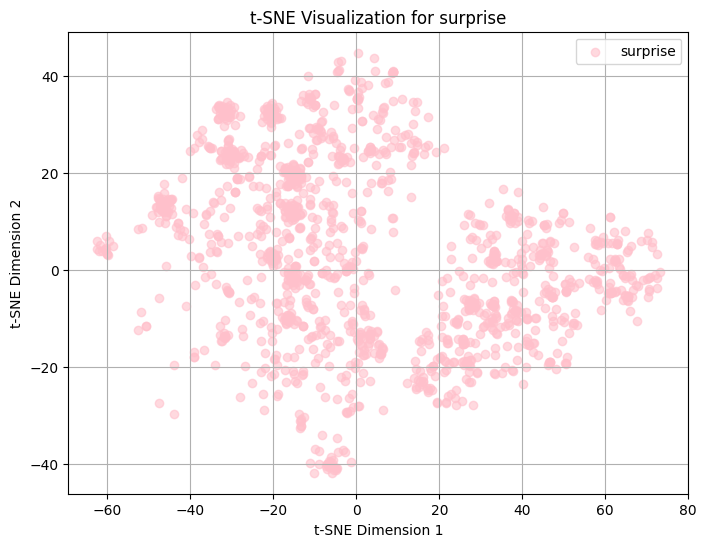

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming 'emotions' is a list of emotion names, and 'X_embedded' and 'y_reduced' are predefined
colormap = {
    "sadness": "blue",
    "joy": "yellow",
    "anger": "red",
    "love": "green",
    "fear": "purple",
    "surprise": "pink"
}

# Assuming 'emotions' is a list of emotion names, and 'X_embedded' and 'y_reduced' are defined
for label in range(len(emotions)):
    emotion_name = emotions[label]

    # Map the label (emotion index) to the correct color from colormap
    if emotion_name in colormap:
        emotion_data = X_embedded[y_reduced == label]

        plt.figure(figsize=(8, 6))

        plt.scatter(emotion_data[:, 0], emotion_data[:, 1],
                    color=colormap[emotion_name],  # Access by emotion name
                    alpha=0.6, label=emotion_name)

        plt.title(f"t-SNE Visualization for {emotion_name}")
        plt.xlabel("t-SNE Dimension 1")
        plt.ylabel("t-SNE Dimension 2")
        plt.legend(loc='upper right')
        plt.grid(True)

        plt.show()


## Pipelines

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk

# Simplified, more picklable tokenizer
class LemmaTokenizer:
    def __init__(self):
        from nltk.stem import WordNetLemmatizer
        from nltk.corpus import stopwords
        
        self.wordnetlemma = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))
    
    def __call__(self, doc):
        # Lowercase and tokenize
        tokens = nltk.word_tokenize(doc.lower())
        
        # Filter and lemmatize
        return [
            self.wordnetlemma.lemmatize(token) 
            for token in tokens 
            if token.isalnum() and token not in self.stop_words
        ]

pipeline_log_reg = Pipeline([
    ('vectorizer', CountVectorizer(analyzer="word", 
                   tokenizer=LemmaTokenizer(), 
                   token_pattern=None, 
                   ngram_range=(1,1), 
                   min_df=10)),
    ('logistic_reg', LogisticRegression(
        max_iter=10000,
        n_jobs = -1
    ))
])

pipeline_rand_forest = Pipeline([
    ('vectorizer', CountVectorizer(analyzer="word", 
                   tokenizer=LemmaTokenizer(), 
                   token_pattern=None, 
                   ngram_range=(1,1), 
                   min_df=10)),
    ('random_forest', RandomForestClassifier())
])
# Vectorization with the new tokenizer
# bow = CountVectorizer(analyzer="word", tokenizer=LemmaTokenizer(), token_pattern=None, ngram_range=(1,1), min_df=10,  max_features=2000)

## Optimización de hiperparametros

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.model_selection import RepeatedKFold, GridSearchCV

# Hyperparameter grid
lambda_range = [1e-4, 1e-3, 1e-2, 0.1, 1, 10]
C_range = [1 / (lambda_value) for lambda_value in lambda_range]
param_grid = {
    'logistic_reg__C': C_range,
    'vectorizer__max_features': [1000, 1500, 2000]
}

metric = 'neg_log_loss'

kfold = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)

# Grid Search
grid_search = GridSearchCV(
    estimator=pipeline_log_reg, 
    param_grid=param_grid, 
    cv=kfold,
    scoring=metric,
    return_train_score=True, 
    verbose=4,
    n_jobs=-1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Detailed results
print("Best parameters:", grid_search.best_params_)
print(f"Best{metric} Score:", grid_search.best_score_)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[CV 8/10] END logistic_reg__C=10000.0, vectorizer__max_features=1000;, score=(train=-0.306, test=-0.342) total time= 3.0min
[CV 4/10] END logistic_reg__C=10000.0, vectorizer__max_features=1000;, score=(train=-0.308, test=-0.337) total time= 3.0min
[CV 1/10] END logistic_reg__C=1000.0, vectorizer__max_features=1000;, score=(train=-0.308, test=-0.335) total time= 3.0min
[CV 8/10] END logistic_reg__C=10000.0, vectorizer__max_features=1500;, score=(train=-0.228, test=-0.278) total time= 3.1min
[CV 9/10] END logistic_reg__C=10000.0, vectorizer__max_features=1500;, score=(train=-0.230, test=-0.267) total time= 3.0min
[CV 7/10] END logistic_reg__C=10000.0, vectorizer__max_features=1000;, score=(train=-0.310, test=-0.332) total time= 3.1min
[CV 3/10] END logistic_reg__C=10000.0, vectorizer__max_features=1000;, score=(train=-0.306, test=-0.329) total time= 3.2min
[CV 10/10] END logistic_reg__C=10000.0, vectorizer__max_features=1000;, score=(train=-0.311, test=-0.331) total time= 3.1min
[CV 5/10

In [14]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_optimizations_curves(results, x_axis, reshape = 6):
    # Obtener lambda
    mean_train_scores = results['mean_train_score'].reshape(reshape,3)
    mean_test_scores = results['mean_test_score'].reshape(reshape,3)
    max_features_cv = results['param_vectorizer__max_features'].reshape(reshape,3)

    train_scores = {f'train_{name}':[] for name in np.unique(max_features_cv)}
    test_scores = {f'test_{name}':[] for name in np.unique(max_features_cv)}

    for name, train, test in zip(max_features_cv, mean_train_scores, mean_test_scores):
        for i in range(len(name)):
            train_scores[f'train_{name[i]}'].append(train[i])
            test_scores[f'test_{name[i]}'].append(test[i])

    for train, test in zip(train_scores.items(), test_scores.items()):
        plt.figure(figsize=(10, 6))
        plt.plot(x_axis[1], train[1], label='Training Loss', marker='o')
        plt.plot(x_axis[1], test[1], label='Validation Loss (CV)', marker='o')

        name = train[0].split('_')[-1]
        # Configuración de la gráfica
        plt.xscale('log')
        plt.xlabel(x_axis[0], fontsize=14)
        plt.ylabel(metric, fontsize=14)
        plt.title(f'{x_axis[0]} vs {metric} (max_features={name})', fontsize=16)
        plt.legend()
        plt.grid(True)
        plt.show()

# prompt: Cómo puedo graficar la curva de aprendizaje usando sklearn.model_selection.learning_curve?
def plot_learning_curve(model, score):
    # Parámetros
    train_sizes = np.linspace(0.1, 1.0, 10)  # Fracciones del conjunto de entrenamiento

    # Calcular la curva de aprendizaje
    train_sizes_abs, train_scores, test_scores = learning_curve(
        estimator=model,  # Modelo o pipeline
        X=X_train, 
        y=y_train, 
        train_sizes=train_sizes,
        cv=5,
        scoring=score,
        n_jobs=-1,
        random_state=42
    )

    # Calcular medias y desviaciones
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Graficar la curva de aprendizaje
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes_abs, train_mean, label='Training Loss', color='blue', marker='o')
    plt.fill_between(train_sizes_abs, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)

    plt.plot(train_sizes_abs, test_mean, label='Validation Loss', color='orange', marker='o')
    plt.fill_between(train_sizes_abs, test_mean - test_std, test_mean + test_std, color='orange', alpha=0.2)

    # Configuración de la gráfica
    plt.xlabel('Número de muestras en el entrenamiento', fontsize=14)
    plt.ylabel(metric, fontsize=14)
    plt.title('Curva de Aprendizaje', fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.show()

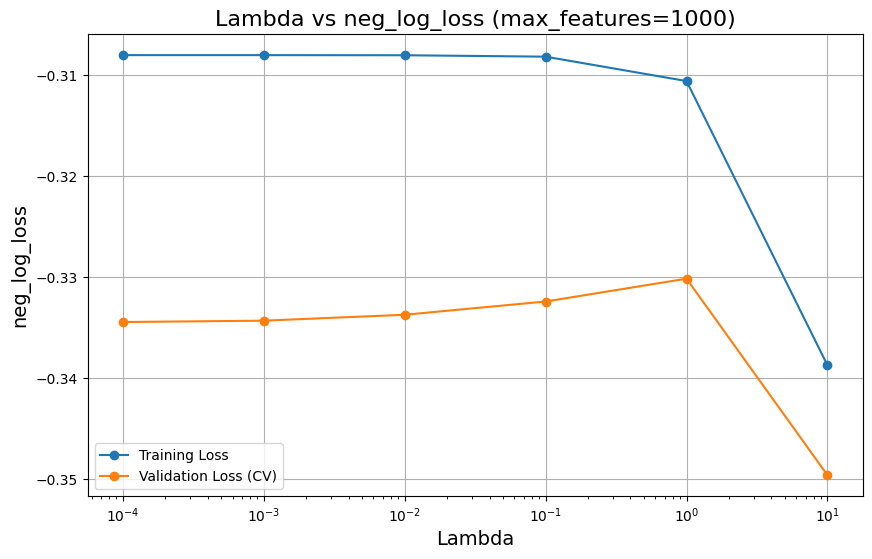

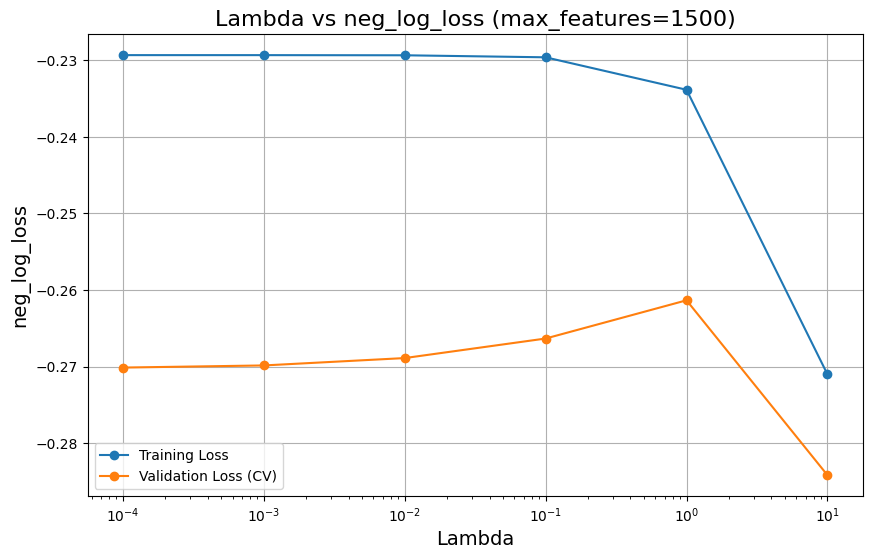

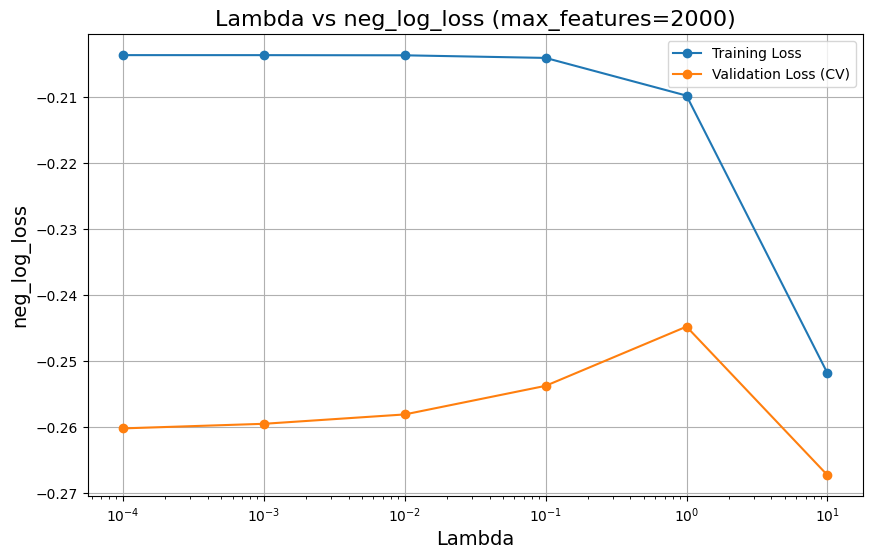

In [15]:
plot_optimizations_curves(grid_search.cv_results_, ('Lambda',lambda_range))

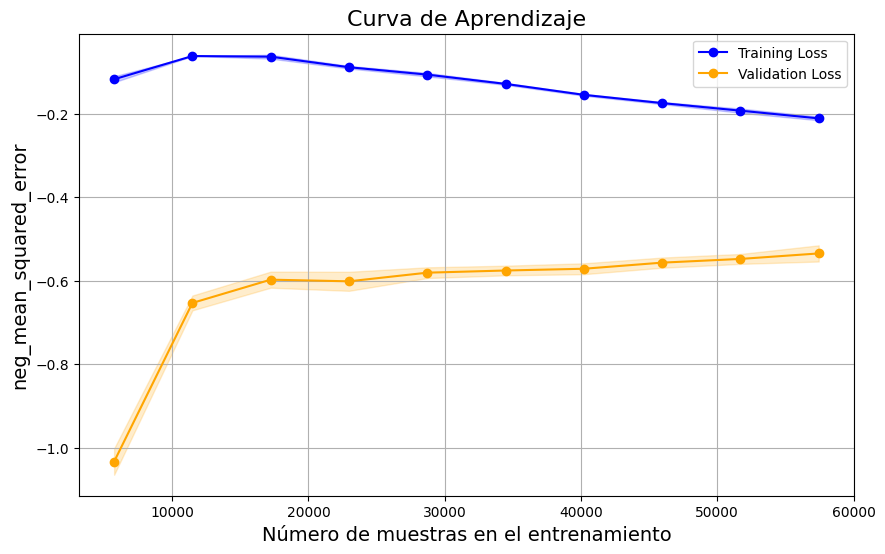

In [18]:
plot_learning_curve(pipeline_log_reg, metric)

In [16]:
# Hyperparameter grid
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

metric = 'neg_log_loss'

param_grid = {
    'random_forest__n_estimators': [10, 50, 100, 200],
    'vectorizer__max_features': [500, 1000, 1500]
}

kfold = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)

# Grid Search
grid_search_rand_forest = GridSearchCV(
    estimator=pipeline_rand_forest, 
    param_grid=param_grid, 
    cv=kfold,
    scoring=metric,
    return_train_score=True, 
    verbose=4,
    n_jobs=-1
)

# Fit the grid search
grid_search_rand_forest.fit(X_train, y_train)

# Detailed results
print("Best parameters:", grid_search_rand_forest.best_params_)
print(f"Best{metric} Score:", grid_search_rand_forest.best_score_)


Fitting 10 folds for each of 12 candidates, totalling 120 fits


[CV 3/10] END random_forest__n_estimators=10, vectorizer__max_features=1000;, score=(train=-0.127, test=-1.292) total time= 3.5min
[CV 8/10] END random_forest__n_estimators=10, vectorizer__max_features=1000;, score=(train=-0.127, test=-1.378) total time= 3.6min
[CV 5/10] END random_forest__n_estimators=10, vectorizer__max_features=1000;, score=(train=-0.128, test=-1.380) total time= 3.6min
[CV 4/10] END random_forest__n_estimators=10, vectorizer__max_features=1000;, score=(train=-0.128, test=-1.374) total time= 3.6min
[CV 6/10] END random_forest__n_estimators=10, vectorizer__max_features=1000;, score=(train=-0.128, test=-1.378) total time= 3.6min
[CV 5/10] END random_forest__n_estimators=10, vectorizer__max_features=1500;, score=(train=-0.105, test=-1.082) total time= 3.6min
[CV 7/10] END random_forest__n_estimators=10, vectorizer__max_features=1000;, score=(train=-0.129, test=-1.368) total time= 3.6min
[CV 8/10] END random_forest__n_estimators=10, vectorizer__max_features=1500;, score

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 3/10] END random_forest__n_estimators=50, vectorizer__max_features=1000;, score=(train=-0.123, test=-0.670) total time=13.1min
[CV 1/10] END random_forest__n_estimators=50, vectorizer__max_features=1000;, score=(train=-0.123, test=-0.699) total time=13.2min
[CV 5/10] END random_forest__n_estimators=50, vectorizer__max_features=1000;, score=(train=-0.123, test=-0.702) total time=13.1min
[CV 10/10] END random_forest__n_estimators=50, vectorizer__max_features=1000;, score=(train=-0.124, test=-0.696) total time=13.2min
[CV 6/10] END random_forest__n_estimators=50, vectorizer__max_features=1500;, score=(train=-0.101, test=-0.490) total time=12.9min
[CV 7/10] END random_forest__n_estimators=50, vectorizer__max_features=1000;, score=(train=-0.124, test=-0.702) total time=13.2min
[CV 4/10] END random_forest__n_estimators=50, vectorizer__max_features=1500;, score=(train=-0.101, test=-0.481) total time=13.0min
[CV 9/10] END random_forest__n_estimators=50, vectorizer__max_features=1500;, scor

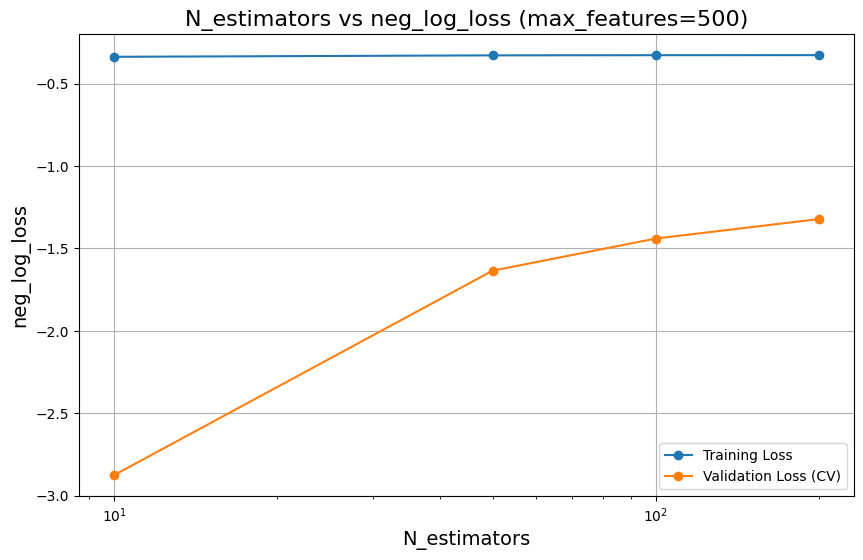

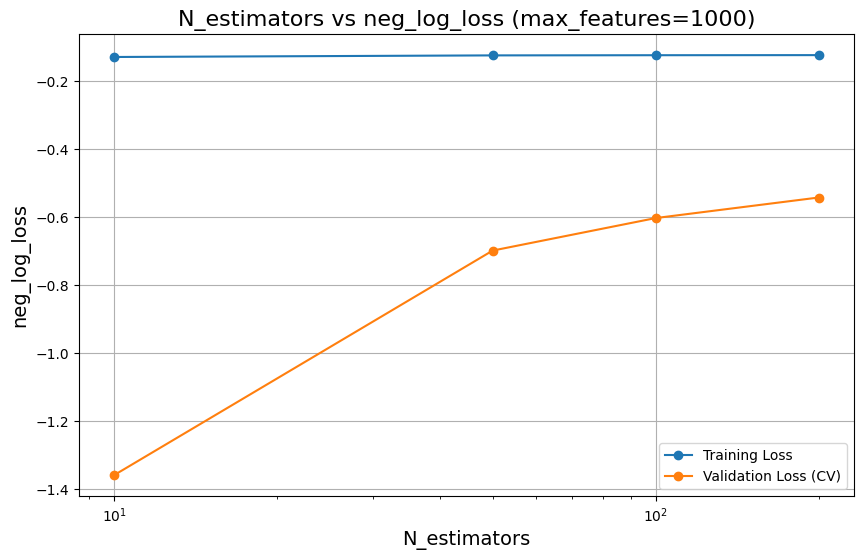

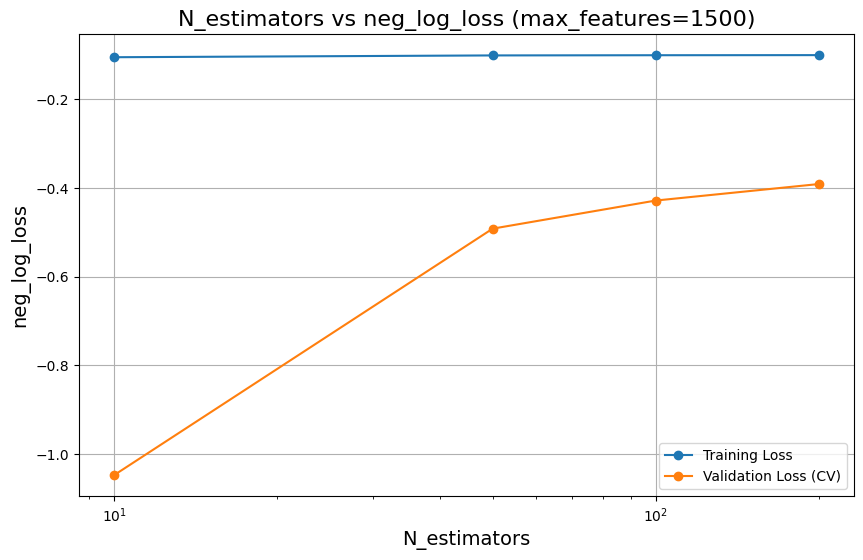

In [17]:
plot_optimizations_curves(grid_search_rand_forest.cv_results_, ('N_estimators',[10, 50, 100, 200]), 4)

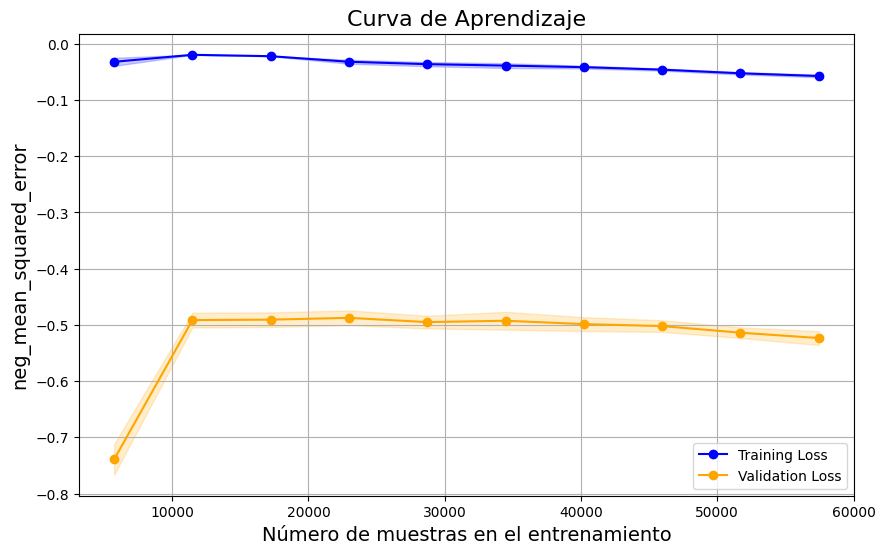

In [17]:
plot_learning_curve(pipeline_rand_forest, metric)

## Comparación estadística

In [15]:
from sklearn.model_selection import cross_val_score
from scipy.stats import wilcoxon
from sklearn.metrics import (accuracy_score, roc_auc_score, roc_curve, precision_score,
                             recall_score, f1_score, classification_report)

'''
Prompt:
Ayudame a con una función para calcular estas metricas usando las libreias de skitlearn
**Métricas**

1. Clasificación: presentar scores de Accuracy, AUC, curva ROC, Precision, Recall, Macro/Micro Average AUC ROC, F1 score macro avg, F1 score weighted avg.
'''
def evaluate_classification_models(pipeline, X_train, X_test, y_train, y_test):
    """
    Evalúa un modelo de clasificación y presenta varias métricas de desempeño.

    Args:
        pipeline: Pipeline del modelo a evaluar (ej. logistic regression o random forest).
        X_train: Conjunto de datos de entrenamiento.
        X_test: Conjunto de datos de prueba.
        y_train: Etiquetas de entrenamiento.
        y_test: Etiquetas de prueba.

    Returns:
        metrics: Diccionario con las métricas calculadas.
    """
    # Ajustar el modelo con datos de entrenamiento
    pipeline.fit(X_train, y_train)
    
    # Realizar predicciones
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test) if hasattr(pipeline[-1], 'predict_proba') else None

    # Calcular métricas
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score (Macro Avg)': f1_score(y_test, y_pred, average='macro'),
        'F1 Score (Weighted Avg)': f1_score(y_test, y_pred, average='weighted')
    }

    # Calcular AUC y generar curva ROC si es posible
    if y_prob is not None:
        # Si es multiclase, se debe especificar el método de cálculo
        if len(np.unique(y_test)) > 2:
            metrics['AUC'] = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')
        else:
            metrics['AUC'] = roc_auc_score(y_test, y_prob[:, 1])

        # Generar curva ROC solo si es binario
        if len(np.unique(y_test)) == 2:
            fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])

            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {metrics["AUC"]:.2f})')
            plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic (ROC) Curve')
            plt.legend()
            plt.grid()
            plt.show()

    # Reporte de clasificación
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)

    return metrics

pipeline_log_reg = Pipeline([
    ('vectorizer', CountVectorizer(analyzer="word", 
                   tokenizer=LemmaTokenizer(), 
                   token_pattern=None, 
                   ngram_range=(1,1), 
                   min_df=10,
                   max_features = 2000)),
    ('logistic_reg', LogisticRegression(
        max_iter=10000,
        C=1/0.1,
        n_jobs = -1
    ))
])

pipeline_rand_forest = Pipeline([
    ('vectorizer', CountVectorizer(analyzer="word", 
                   tokenizer=LemmaTokenizer(), 
                   token_pattern=None, 
                   ngram_range=(1,1), 
                   min_df=10,
                   max_features = 1500)),
    ('random_forest', RandomForestClassifier(n_estimators=200))
])

# Ejemplo de uso con tus pipelines y datos:
metrics_log_reg = evaluate_classification_models(pipeline_log_reg, X_train, X_test, y_train, y_test)
metrics_rand_forest = evaluate_classification_models(pipeline_rand_forest, X_train, X_test, y_train, y_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      2979
           1       0.88      0.86      0.87      2949
           2       0.90      0.93      0.92      3075
           3       0.91      0.90      0.90      3000
           4       0.88      0.85      0.87      3034
           5       0.89      0.93      0.91      2914

    accuracy                           0.90     17951
   macro avg       0.90      0.90      0.90     17951
weighted avg       0.90      0.90      0.90     17951

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      2979
           1       0.88      0.82      0.85      2949
           2       0.88      0.95      0.91      3075
           3       0.89      0.90      0.89      3000
           4       0.85      0.84      0.84      3034
           5       0.88      0.92      0.90      2914

    accuracy                 

In [16]:
# Evaluar el modelo
scores_log_reg = cross_val_score(pipeline_log_reg, X_train, y_train, scoring='accuracy', cv=kfold, n_jobs=-1)
scores_rand_forest = cross_val_score(pipeline_rand_forest, X_train, y_train, scoring='accuracy', cv=kfold, n_jobs=-1)

# Calcular el test de Wilcoxon
statistic, p_value = wilcoxon(scores_log_reg, scores_rand_forest)

print(f'Estadístico: {statistic}, P-valor: {p_value}')

Estadístico: 0.0, P-valor: 0.001953125


## Conclusiones

### Rendimiento General
La comparación de los modelos de Regresión Logística y Bosque Aleatorio revela diferencias significativas en su rendimiento al clasificar el conjunto de datos. Las métricas de evaluación indican que la Regresión Logística supera al Bosque Aleatorio en términos de precisión, recall y F1 Score:

- **Regresión Logística**:
  - Precisión: **90%**
  - Recall: **90%**
  - F1 Score: **90%**

- **Bosque Aleatorio**:
  - Precisión: **88%**
  - Recall: **88%**
  - F1 Score: **88%**

Estas métricas sugieren que la Regresión Logística no solo es más precisa, sino que también mantiene un mejor equilibrio entre la precisión y el recall, lo que es crucial en aplicaciones donde ambas métricas son importantes.
También cabe acotar que las gráficas de optimización y aprendizaje que presentaba Bosque Aleatorio demostraban alta varianza.

### Test de Wilcoxon
El test de Wilcoxon realizado para evaluar la diferencia en el rendimiento entre ambos modelos arrojó un estadístico de **0.0** y un p-valor de **0.001953125**. Estos resultados indican:

- La hipótesis nula (que no hay diferencia significativa entre los modelos) puede ser rechazada con un alto nivel de confianza, dado que el p-valor es menor que el umbral comúnmente utilizado de **0.05**.
- La diferencia observada en las puntuaciones sugiere que la Regresión Logística tiene un rendimiento significativamente mejor que el Bosque Aleatorio en este conjunto de datos.

### Recomendaciones
1. **Selección del Modelo**: Basado en el rendimiento general y las pruebas estadísticas, se recomienda optar por la Regresión Logística para este problema específico, ya que proporciona mejores resultados en términos de precisión y equilibrio entre precisión y recall.

2. **Exploración Adicional**: Se sugiere realizar ajustes adicionales a los hiperparámetros del modelo de Bosque Aleatorio para intentar mejorar su rendimiento, así como explorar técnicas de ensamblaje que podrían combinar las fortalezas de ambos modelos.

3. **Validación Continua**: Es recomendable continuar evaluando ambos modelos con diferentes conjuntos de datos y métricas adicionales para asegurar su robustez y generalización a otros contextos.

En resumen, la Regresión Logística se presenta como una opción más efectiva para este problema específico, respaldada por métricas sólidas y análisis estadísticos significativos.

## Referencias
Documentación de SciPy - Prueba de rangos con signo de Wilcoxon
"scipy.stats.wilcoxon," Documentación de SciPy, [En línea]. Disponible en: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html. [Accedido: 13-dic-2024].

Documentación de Scikit-learn - Curva de Aprendizaje
"sklearn.model_selection.learning_curve," Documentación de Scikit-learn, [En línea]. Disponible en: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html. [Accedido: 13-dic-2024].

Documentación de Scikit-learn - Validación Cruzada
"sklearn.model_selection.cross_validate," Documentación de Scikit-learn, [En línea]. Disponible en: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate. [Accedido: 13-dic-2024].

Documentación de Scikit-learn - GridSearchCV
"sklearn.model_selection.GridSearchCV," Documentación de Scikit-learn, [En línea]. Disponible en: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html. [Accedido: 13-dic-2024].

Documentación de Scikit-learn - Regresión Logística
"sklearn.linear_model.LogisticRegression," Documentación de Scikit-learn, [En línea]. Disponible en: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. [Accedido: 13-dic-2024].

Documentación de Scikit-learn - Clasificador Random Forest
"sklearn.ensemble.RandomForestClassifier," Documentación de Scikit-learn, [En línea]. Disponible en: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html. [Accedido: 13-dic-2024].